In [27]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [29]:
#loading dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/content/mbti_1.csv")
df.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [30]:
df.isnull().any()

type     False
posts    False
dtype: bool

In [31]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [32]:
df.dtypes

type     object
posts    object
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [34]:
df.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [35]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [36]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition',
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling',
        'J':'Judging', 'P': 'Perceiving'}

In [37]:
total = df.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total posts for each personality type')

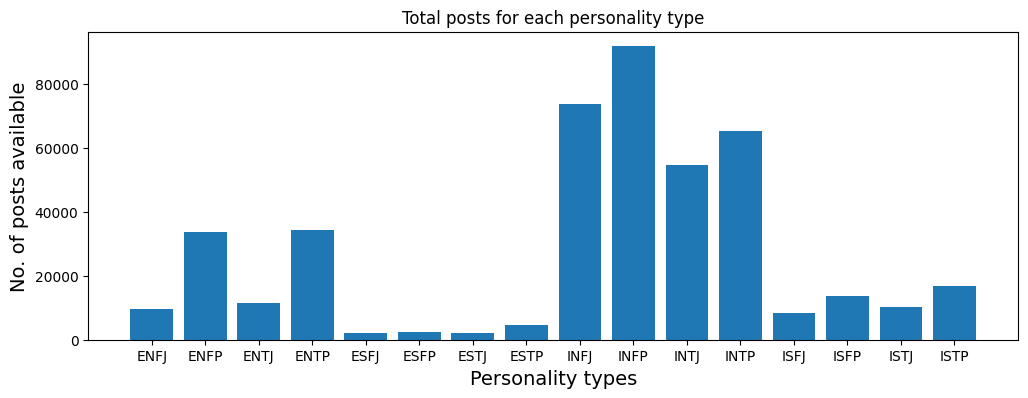

In [38]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

In [56]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')  # Download stopwords data if not already present

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
import re
from bs4 import BeautifulSoup  # Add this import

# Assuming you've already defined 'stop' as a set of stopwords

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)  # Use the correct function for removing URLs
    text = remove_stopwords(text)
    return text

df['posts'] = df['posts'].apply(denoise_text)
df

,type,posts,no. of. words
0,INFJ,enfp intj moments sportscenter plays pranks li...,430
1,ENTP,finding lack posts alarming eostokendot boring...,803
2,INTP,good course know thats blessing curse eostoken...,253
3,INTJ,dear intp enjoyed conversation eostokendot eso...,777
4,ENTJ,youre fired eostokendot thats another silly mi...,402
...,...,...,...
8670,ISFP,ixfp always think cats doms reason eostokendot...,564
8671,ENFP,eostokendot eostokendot eostokendot thread alr...,18
8672,INTP,many questions things eostokendot would take p...,715
8673,INFP,conflicted right comes wanting children eostok...,1184


In [58]:
words = []
for i in df.posts.values:
    words.append(i.split())
words[:5]

[['enfp',
  'intj',
  'moments',
  'sportscenter',
  'plays',
  'pranks',
  'lifechanging',
  'experience',
  'life',
  'eostokenquest',
  'repeat',
  'today',
  'eostokendot',
  'perc',
  'experience',
  'immerse',
  'eostokendot',
  'last',
  'thing',
  'infj',
  'friend',
  'posted',
  'facebook',
  'committing',
  'suicide',
  'next',
  'eostokendot',
  'rest',
  'peace',
  'hello',
  'enfj',
  'eostokendot',
  'sorry',
  'hear',
  'distress',
  'eostokendot',
  'natural',
  'relationship',
  'perfection',
  'time',
  'every',
  'moment',
  'existence',
  'eostokendot',
  'figure',
  'hard',
  'times',
  'times',
  'growth',
  'eostokendot',
  'eostokendot',
  'eostokendot',
  'eostokendot',
  'eostokendot',
  'eostokendot',
  'welcome',
  'stuff',
  'eostokendot',
  'game',
  'eostokendot',
  'eostokendot',
  'match',
  'eostokendot',
  'prozac',
  'wellbrutin',
  'least',
  'thirty',
  'minutes',
  'moving',
  'legs',
  'dont',
  'mean',
  'moving',
  'sitting',
  'desk',
  'chai

In [60]:
!pip install --upgrade gensim
import gensim

# Dimension of vectors we are generating
EMBEDDING_DIM = 200

# Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=words, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [61]:
# Vocab size using the new approach
vocab_size = len(w2v_model.wv.key_to_index)
print("Vocabulary size:", vocab_size)

Vocabulary size: 98735


In [65]:
from keras.preprocessing import text
from keras.preprocessing import sequence
tokenizer = text.Tokenizer(num_words=90000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [66]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [67]:
def get_weight_matrix(model, vocab):
    # Total vocabulary size + 1 for unknown words (words not present in the Word2Vec model)
    vocab_size = len(vocab) + 1
    # Initialize the weight matrix with zeros
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

    # Iterate over the vocabulary and store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        try:
            weight_matrix[i] = model.get_vector(word)
        except KeyError:
            # Handle the case where the word is not present in the Word2Vec model
            # You may choose to leave it as zeros or use a special vector for unknown words
            pass

    return weight_matrix

In [68]:
# Getting embedding vectors from Word2Vec and using them as weights for a non-trainable Keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv, tokenizer.word_index)

#Defining Neural Network
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
import keras
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.00001), loss='categorical_crossentropy', metrics=['acc'])

del embedding_vectors

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           19747200  
                                                                 
 bidirectional (Bidirection  (None, 20, 256)           336896    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                55680     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 20139841 (76.83 MB)
Trainable params: 20139841 (76.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, df.type , test_size = 0.3 , random_state = 0)

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
48/48 [==============================] - 45s 935ms/step - loss: 0.0000e+00 - acc: 0.0738 - val_loss: 0.0000e+00 - val_acc: 0.0761
Epoch 2/3
48/48 [==============================] - 39s 806ms/step - loss: 0.0000e+00 - acc: 0.0754 - val_loss: 0.0000e+00 - val_acc: 0.0765
Epoch 3/3
48/48 [==============================] - 37s 781ms/step - loss: 0.0000e+00 - acc: 0.0771 - val_loss: 0.0000e+00 - val_acc: 0.0765


In [81]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

190/190 [==============================] - 5s 28ms/step - loss: 0.0000e+00 - acc: 0.0781
Accuracy of the model on Training Data is -  7.80632421374321
82/82 [==============================] - 4s 45ms/step - loss: 0.0000e+00 - acc: 0.0765
Accuracy of the model on Testing Data is -  7.6450251042842865


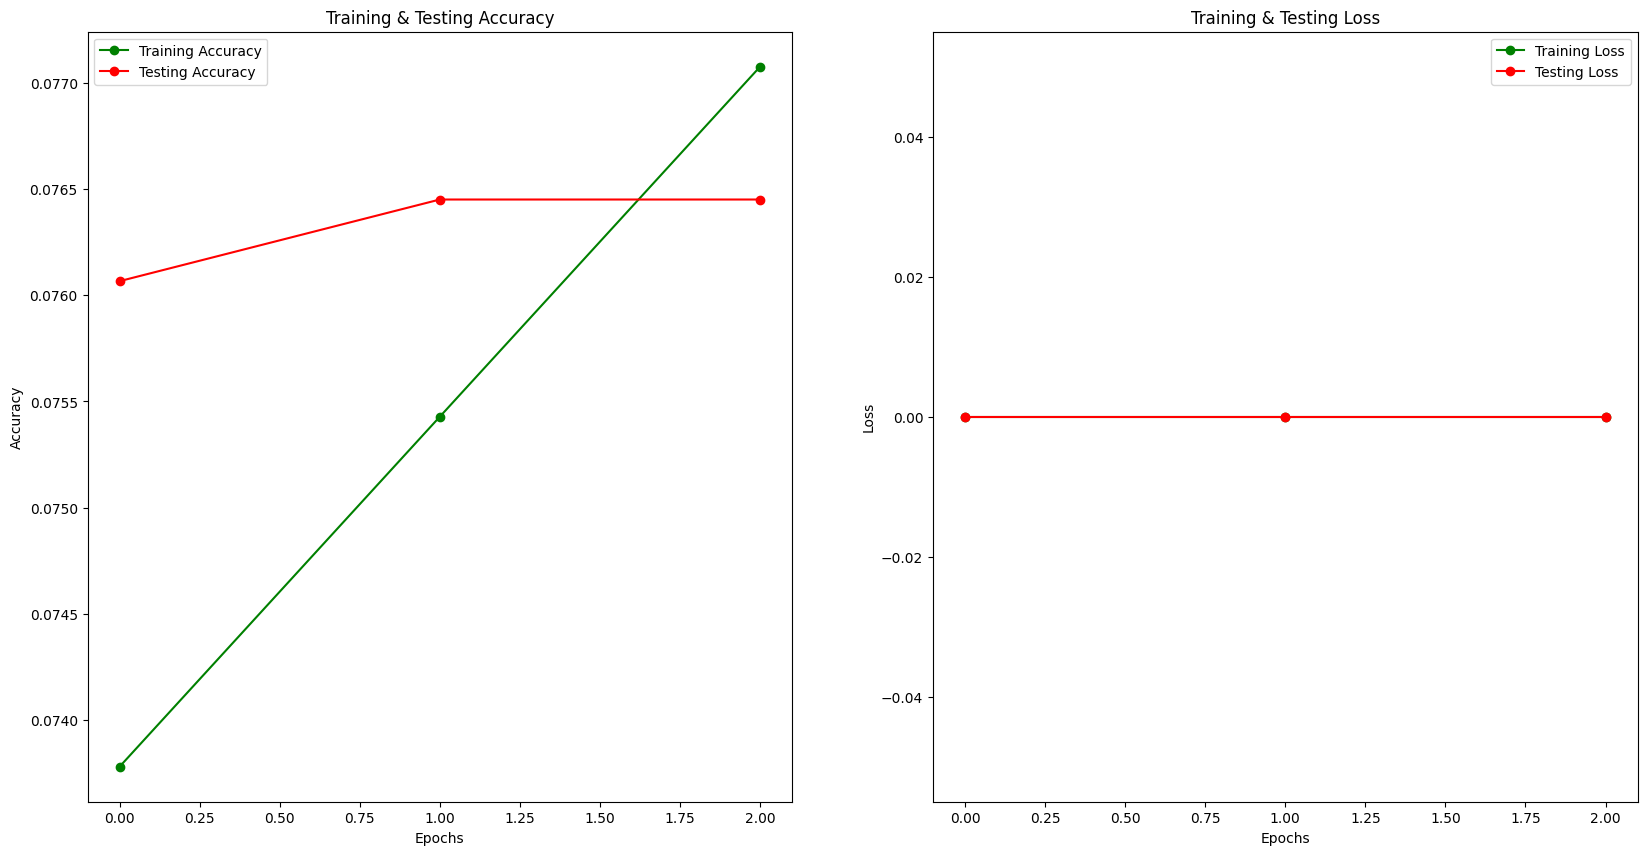

In [82]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()